In [29]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=2)
%config InlineBackend.figure_formats = {'png', 'retina'}


df = pd.read_csv("../data/df_baseline.csv")

# Statistics

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 18 columns):
label             1091 non-null int64
artist            1091 non-null object
album             1091 non-null object
genre             1091 non-null object
single_count      1091 non-null int64
freq_billboard    1091 non-null int64
freq_genius       1091 non-null int64
freq_theSource    1091 non-null int64
freq_xxl          1091 non-null int64
rating_AOTY       61 non-null float64
rating_meta       324 non-null float64
rating_pitch      220 non-null float64
twitter           1091 non-null int64
instagram         1091 non-null int64
facebook          1091 non-null int64
spotify           1091 non-null int64
soundcloud        1091 non-null int64
youtube           1091 non-null int64
dtypes: float64(3), int64(12), object(3)
memory usage: 153.5+ KB


In [3]:
df.describe()

,label,single_count,freq_billboard,freq_genius,freq_theSource,freq_xxl,rating_AOTY,rating_meta,rating_pitch,twitter,instagram,facebook,spotify,soundcloud,youtube
count,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,61.000000,324.000000,220.000000,1.091000e+03,1.091000e+03,1.091000e+03,1.091000e+03,1.091000e+03,1.091000e+03
mean,0.208066,2.594867,0.637947,1.384968,13.283226,230.505958,66.098361,71.015432,6.810000,8.139427e+05,1.141043e+06,9.358003e+05,4.024939e+05,2.030177e+05,5.735448e+05
std,0.406110,2.805128,3.360590,24.033583,40.392109,921.305303,16.944719,9.724840,1.360932,3.582635e+06,6.275179e+06,3.380790e+06,1.139706e+06,8.844483e+05,1.901540e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,65.000000,6.100000,3.965000e+03,0.000000e+00,1.012750e+04,7.023000e+03,0.000000e+00,0.000000e+00
50%,0.000000,2.000000,0.000000,0.000000,0.000000,6.000000,69.000000,72.500000,7.050000,4.082700e+04,3.155100e+04,8.046400e+04,4.656800e+04,1.647000e+03,1.924800e+04
75%,0.000000,4.000000,0.000000,0.000000,4.000000,64.000000,76.000000,78.000000,7.800000,2.943685e+05,3.010275e+05,4.576205e+05,2.258395e+05,3.143000e+04,2.148705e+05
max,1.000000,37.000000,73.000000,731.000000,200.000000,12802.000000,85.000000,92.000000,9.500000,5.696178e+07,1.366012e+08,6.167920e+07,1.382065e+07,9.710262e+06,2.367711e+07


# Target Variable Count

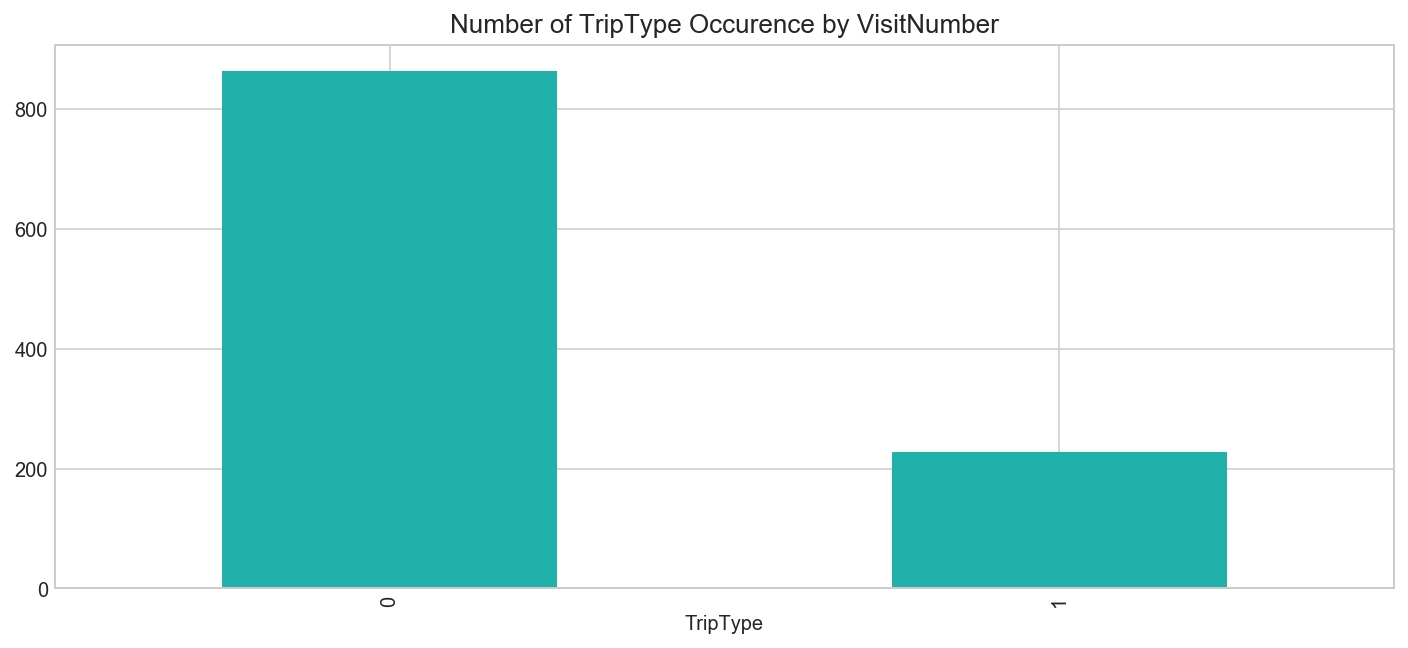

In [7]:
plt.figure(figsize=(12, 5))

a = df["label"]
a = a.value_counts()
a.plot(kind='bar', color="lightseagreen")
plt.title("Number of TripType Occurence by VisitNumber", fontsize=13)
plt.xlabel("TripType")

plt.show()

# Single Count

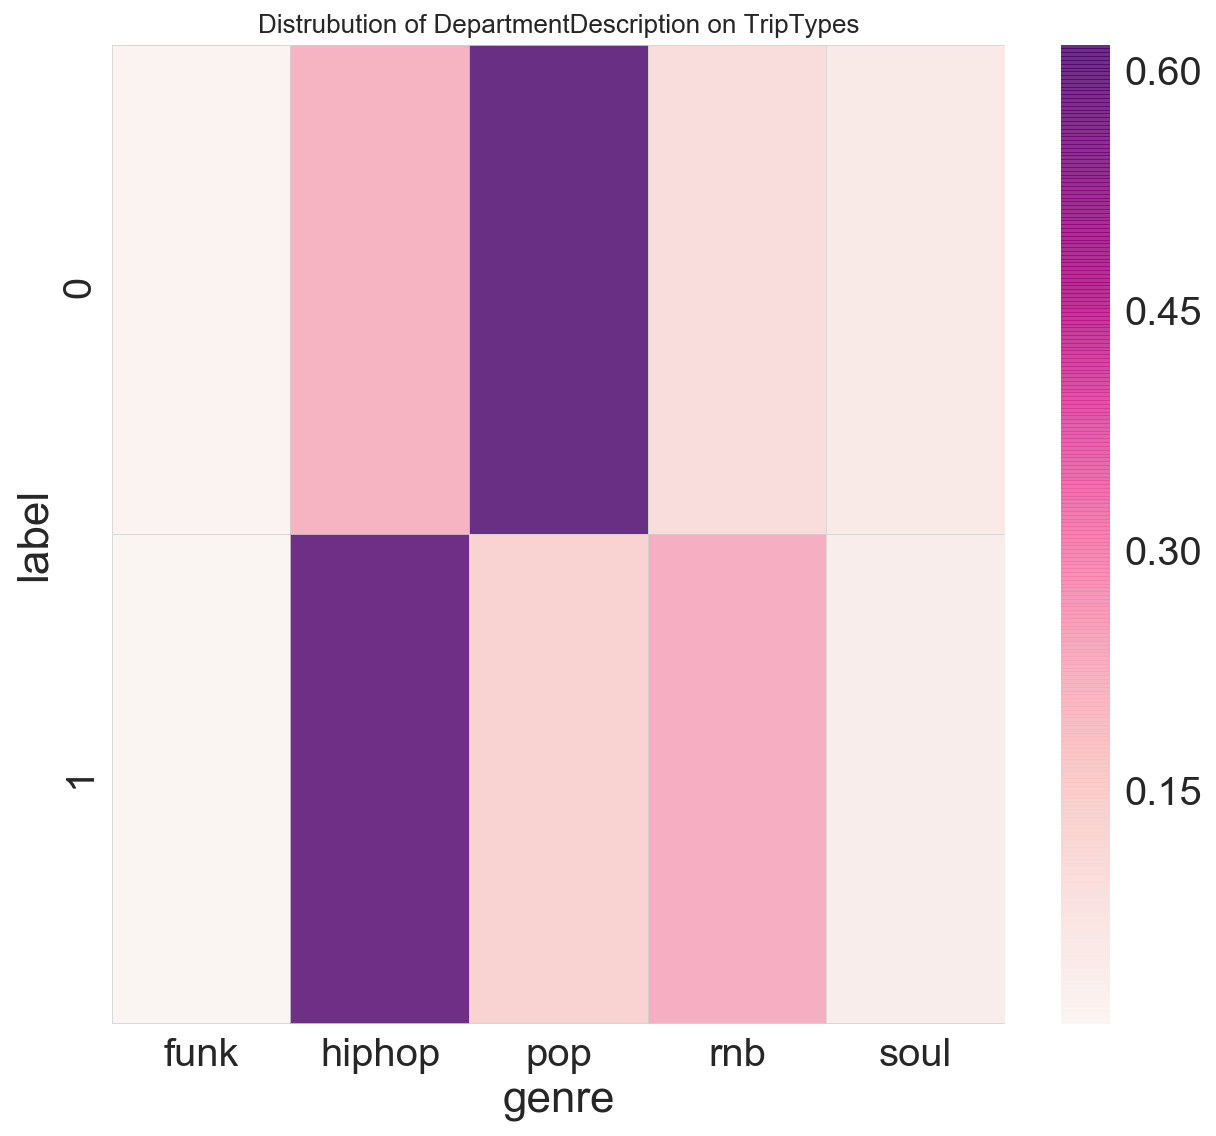

In [31]:
tmp = pd.crosstab(df["label"], 
                df["genre"], 
                values=df["single_count"], 
                aggfunc="count",
                normalize="index"
                )

plt.figure(figsize=(10, 9))
sns.heatmap(tmp, linecolor="lightgrey", linewidths=0.02, cmap="RdPu", alpha=.8)
plt.title("Distrubution of DepartmentDescription on TripTypes", fontsize=13)
plt.show()

# Buzz Frequency

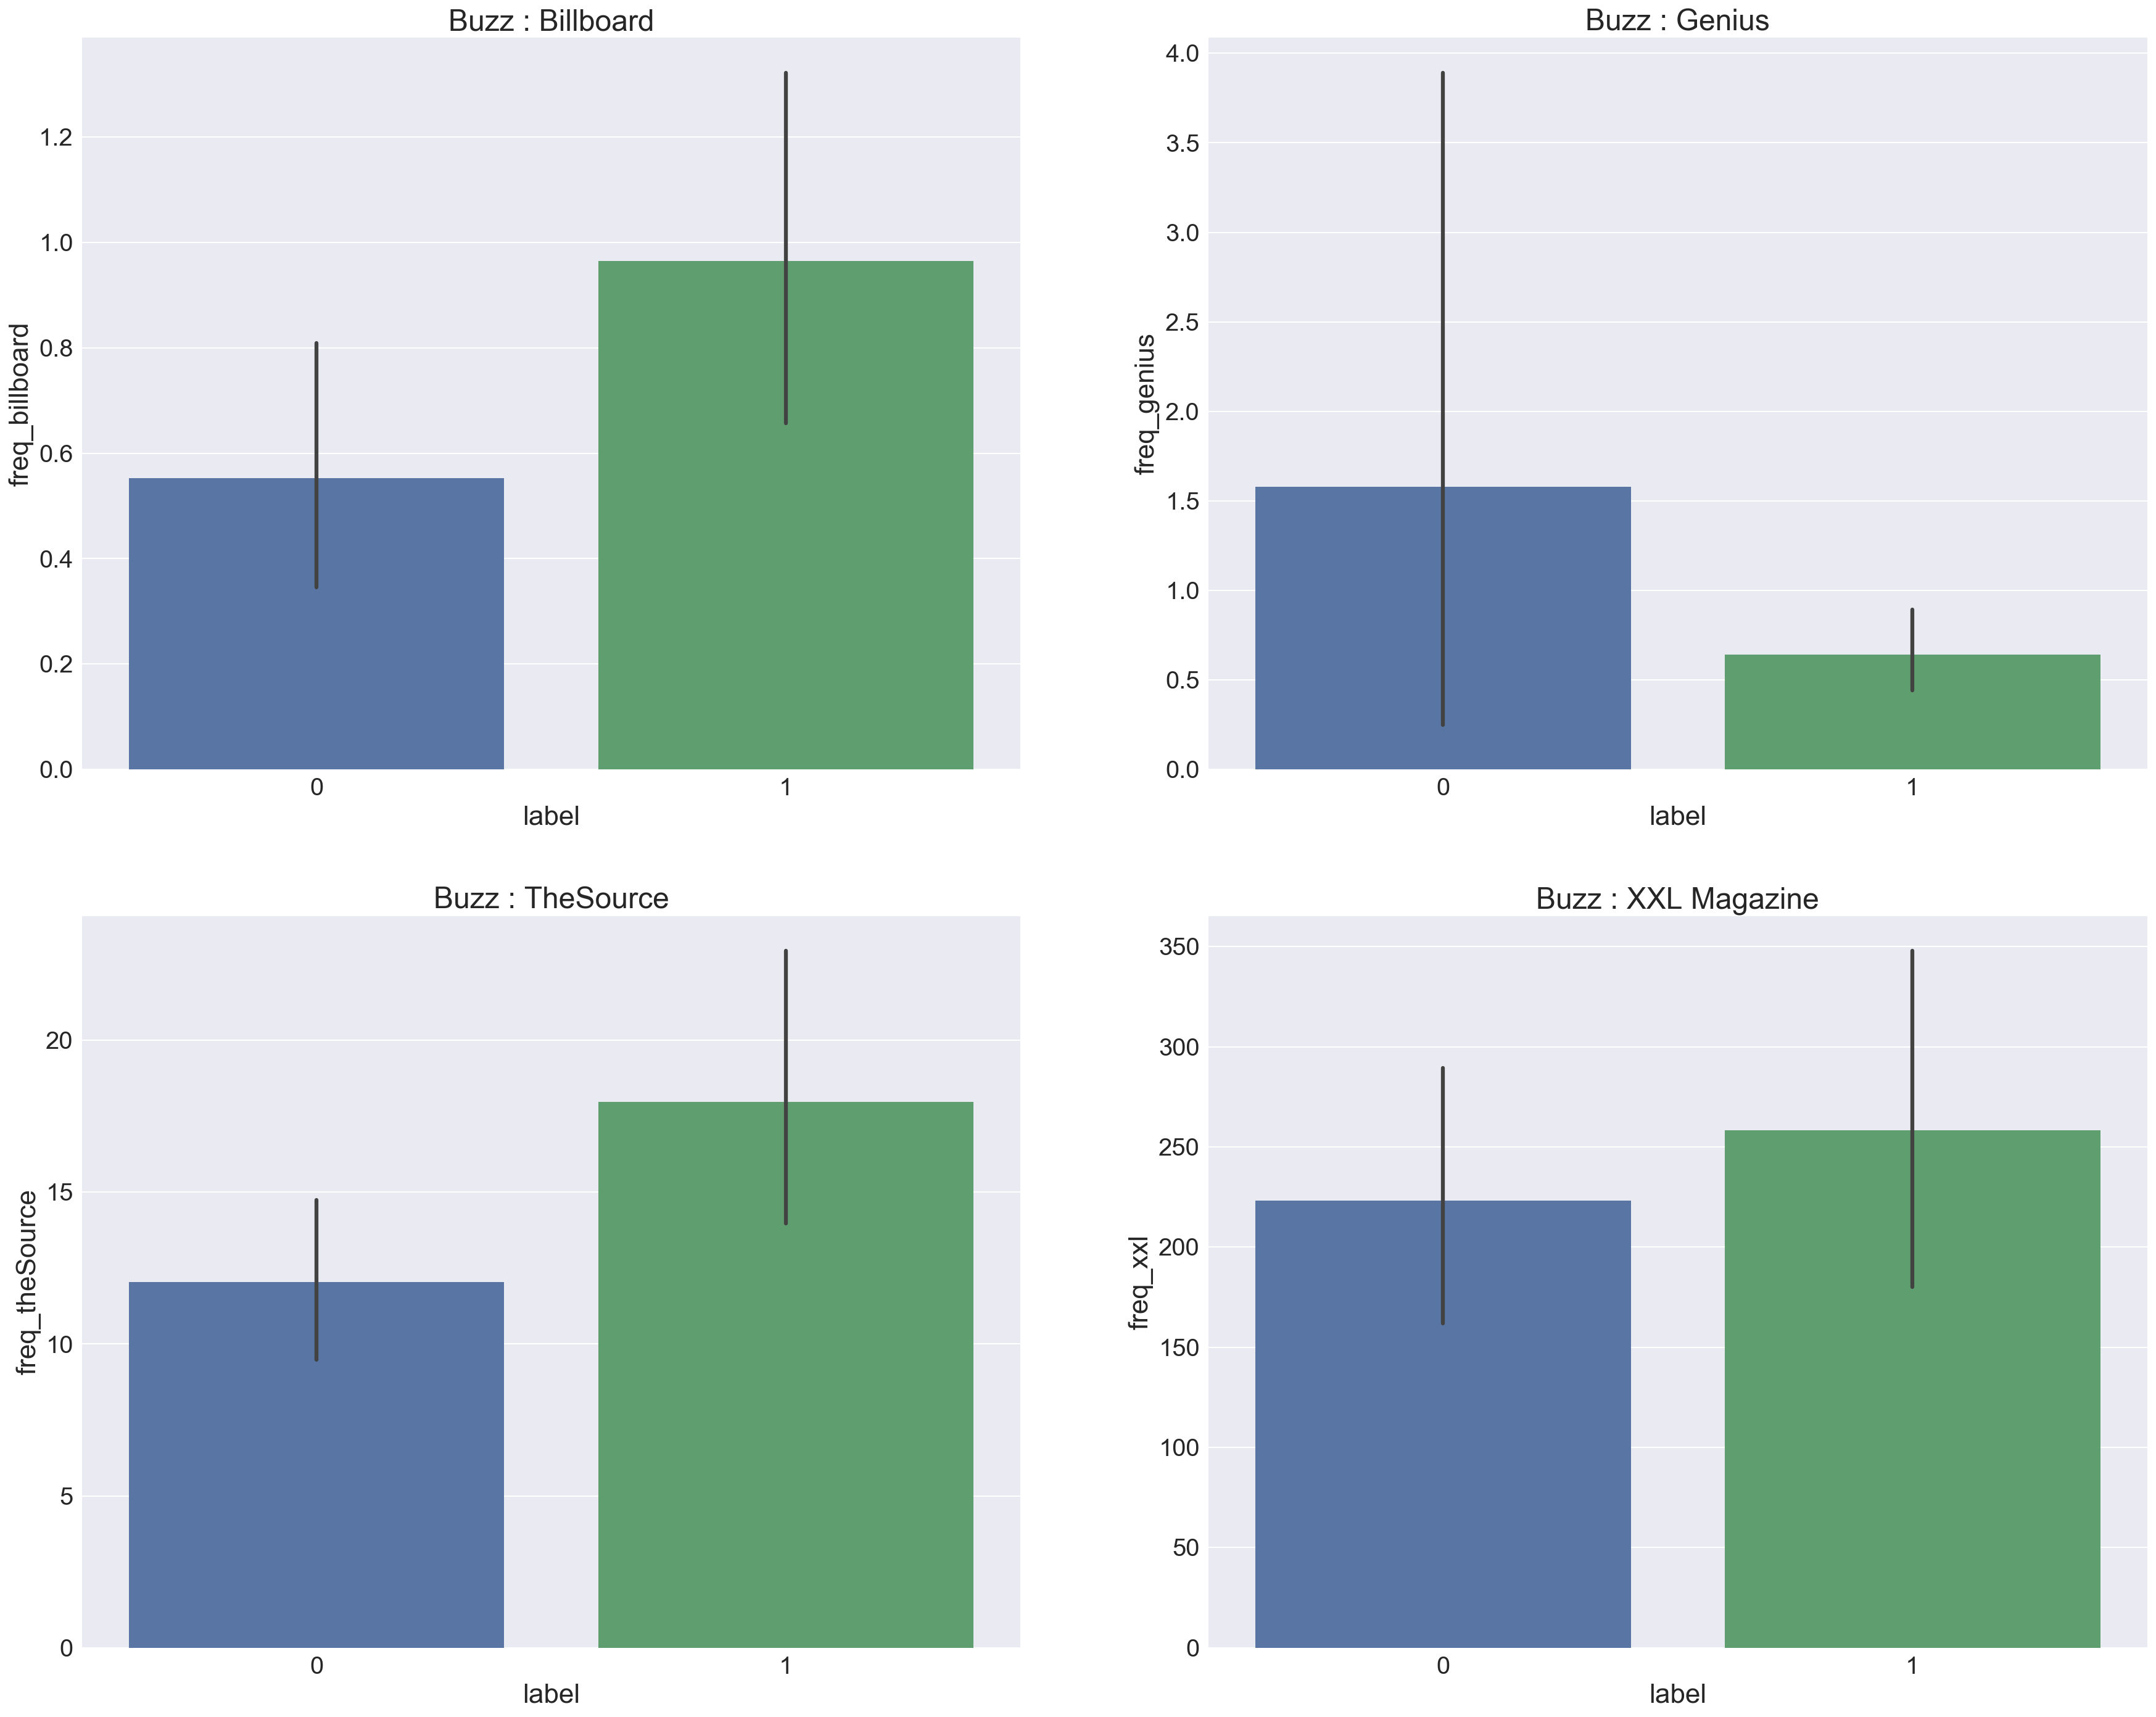

In [35]:
fig = plt.figure(figsize=(30, 24))

ax1 = fig.add_subplot(221)
sns.barplot(x="label", y="freq_billboard", data=df,).set_title("Buzz : Billboard")

ax2 = fig.add_subplot(222)
sns.barplot(x="label", y="freq_genius", data=df).set_title("Buzz : Genius")

ax3 = fig.add_subplot(223)
sns.barplot(x="label", y="freq_theSource", data=df).set_title("Buzz : TheSource")

ax4 = fig.add_subplot(224)
sns.barplot(x="label", y="freq_xxl", data=df).set_title("Buzz : XXL Magazine")

plt.show()